# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Loading the dataset

In [3]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\blod\\transfusion.csv')
dataset.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Exploratory data analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
dataset.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<AxesSubplot:>

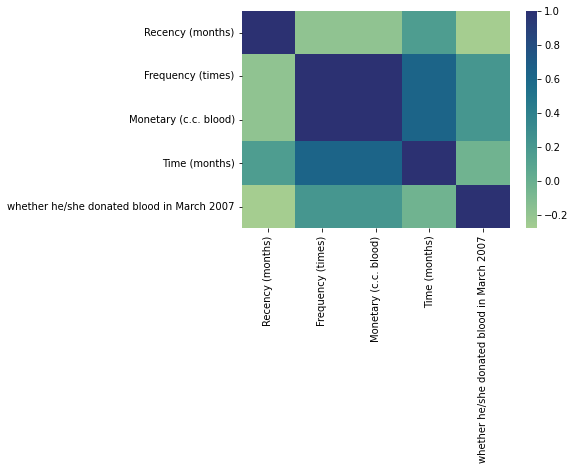

In [7]:
sns.heatmap(dataset.corr(),cmap='crest')

In [36]:
dataset=dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            533 non-null    int64
 1   Frequency (times)                           533 non-null    int64
 2   Monetary (c.c. blood)                       533 non-null    int64
 3   Time (months)                               533 non-null    int64
 4   whether he/she donated blood in March 2007  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


In [37]:
print(dataset['whether he/she donated blood in March 2007'].value_counts())
cls_0=dataset[dataset['whether he/she donated blood in March 2007']==0]
cls_1=dataset[dataset['whether he/she donated blood in March 2007']==1]

0    384
1    149
Name: whether he/she donated blood in March 2007, dtype: int64


In [38]:
cls_0=cls_0.sample(500,replace=True)
cls_1=cls_1.sample(500,replace=True)
dataset=pd.concat([cls_0,cls_1],axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 114 to 180
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            1000 non-null   int64
 1   Frequency (times)                           1000 non-null   int64
 2   Monetary (c.c. blood)                       1000 non-null   int64
 3   Time (months)                               1000 non-null   int64
 4   whether he/she donated blood in March 2007  1000 non-null   int64
dtypes: int64(5)
memory usage: 46.9 KB


# Splitting dataset into train and test

In [40]:
y=dataset['whether he/she donated blood in March 2007']
x=dataset.drop(['whether he/she donated blood in March 2007'],axis=1)
for column in x.columns:
    x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min()) 
x.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
114,0.027027,0.224490,0.224490,0.833333
34,0.027027,0.306122,0.306122,0.645833
280,0.189189,0.306122,0.306122,0.708333
719,0.310811,0.142857,0.142857,0.697917
111,0.054054,0.163265,0.163265,0.458333


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',gamma=8)
svc_model.fit(X_train,y_train)

SVC(gamma=8)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= svc_model .predict(X_train)
percentage=svc_model.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_model .predict(X_test)
train_percentage=svc_model.score(X_train,y_train)
test_percentage=svc_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("Testing confusion matrix")
print(res)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(f"Train set:{len(X_train)}")
print(f"Train Accuracy={train_percentage*100}%")
print(f"Test set:{len(X_test)}")
print(f"Test Accuracy={test_percentage*100}%")

Training confusion matrix
[[293 107]
 [114 286]]
Testing confusion matrix
[[62 38]
 [39 61]]
0.72375
0.615
Train set:800
Train Accuracy=72.375%
Test set:200
Test Accuracy=61.5%


In [43]:
from xgboost import XGBClassifier
svc_model1=XGBClassifier()
svc_model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= svc_model1 .predict(X_train)
percentage=svc_model1.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_model1 .predict(X_test)
train_percentage=svc_model1.score(X_train,y_train)
test_percentage=svc_model1.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("Testing confusion matrix")
print(res)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print(f"Train set:{len(X_train)}")
print(f"Train Accuracy={train_percentage*100}%")
print(f"Test set:{len(X_test)}")
print(f"Test Accuracy={test_percentage*100}%")

Training confusion matrix
[[378  22]
 [  8 392]]
Testing confusion matrix
[[89 11]
 [14 86]]
0.72375
0.615
Train set:800
Train Accuracy=96.25%
Test set:200
Test Accuracy=87.5%
